In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df[df[:]==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## By Google we came to know insulin value can never be 0 Neither Skin Thickness Nor Glucose Nor BloodPressure  Nor BMI  Hence These Are Type Error

In [21]:
df['Insulin'].replace(0,np.nan,inplace=True)
df['SkinThickness'].replace(0,np.nan,inplace=True)
df['BMI'].replace(0,np.nan,inplace=True)
df['Glucose'].replace(0,np.nan,inplace=True)
df['BloodPressure'].replace(0,np.nan,inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [22]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [24]:
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
df.isnull().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## We Get Rid ALL From All The Missing Value

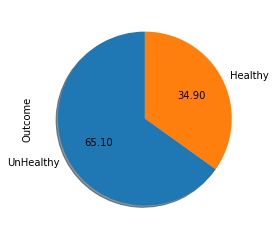

In [26]:
labels = 'UnHealthy', 'Healthy'
df['Outcome'].value_counts().plot.pie(labels=labels,autopct = '%.2f',shadow=True, startangle=90)


## There Are A Lot More Patient Of Diabetes Then Health In Our Dataset

In [27]:
df.groupby('Outcome')['Age'].max()

Outcome
0    81
1    70
Name: Age, dtype: int64

In [28]:
df.groupby('Outcome')['Age'].min()

Outcome
0    21
1    21
Name: Age, dtype: int64

## Minimum Age Of Diabetes Patient Is 21 And Max 81

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1369DA90>,
      dtype=object)

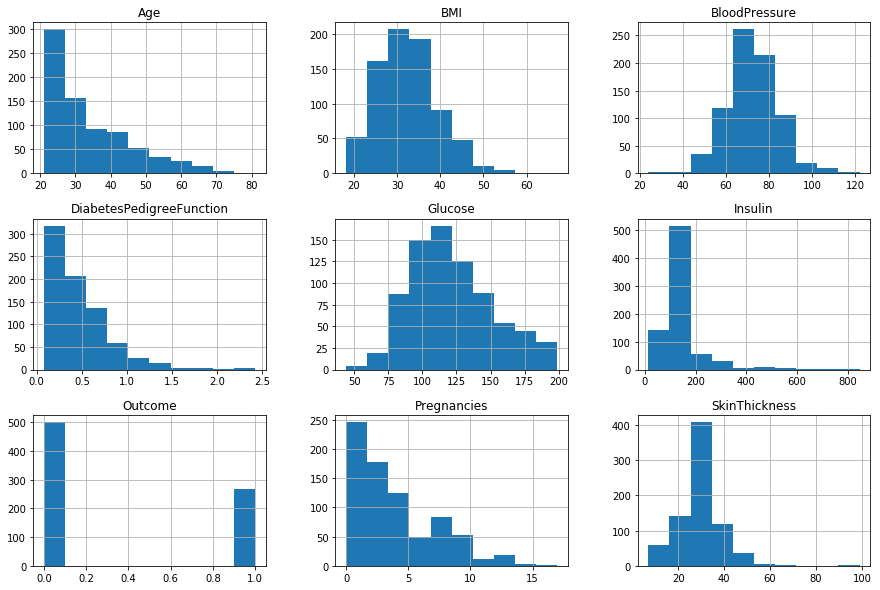

In [29]:
df.hist(figsize=(15,10))


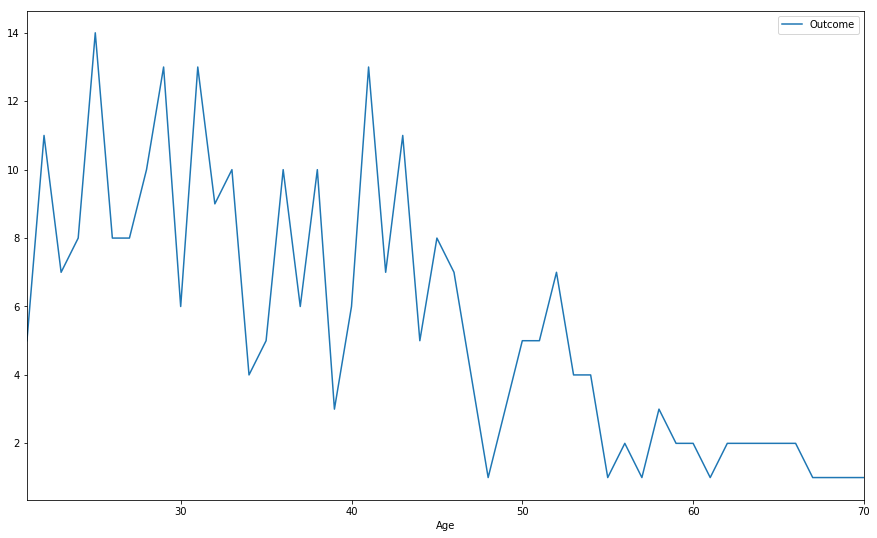

In [30]:
df[df['Outcome']==1].groupby('Age')[['Outcome']].count().plot(figsize=(15,9))


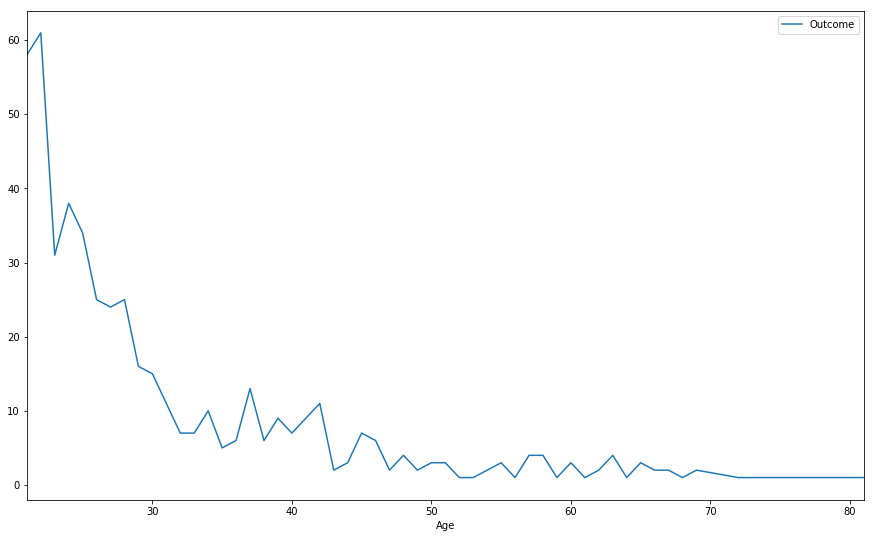

In [31]:
df[df['Outcome']==0].groupby('Age')[['Outcome']].count().plot(figsize=(15,9))

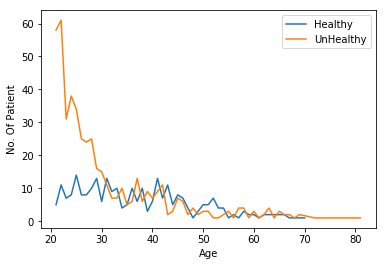

In [32]:
plt.plot(df[df['Outcome']==1].groupby('Age')[['Outcome']].count(),label='Healthy')
plt.plot(df[df['Outcome']==0].groupby('Age')[['Outcome']].count(),label='UnHealthy')
plt.xlabel('Age')
plt.ylabel('No. Of Patient')
plt.legend()

plt.show()


## We Can Clealry See The Distribution Of Diabtese Patient And Healthy With Respect TO Age

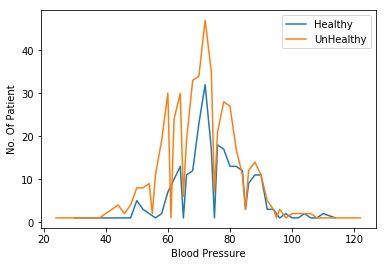

In [33]:
plt.plot(df[df['Outcome']==1].groupby('BloodPressure')[['Outcome']].count(),label='Healthy')
plt.plot(df[df['Outcome']==0].groupby('BloodPressure')[['Outcome']].count(),label='UnHealthy')
plt.xlabel('Blood Pressure')
plt.ylabel('No. Of Patient')
plt.legend()

plt.show()


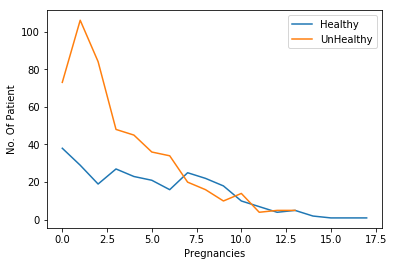

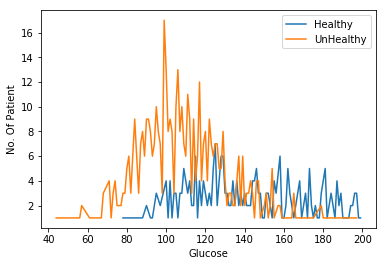

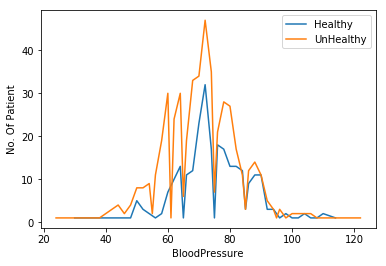

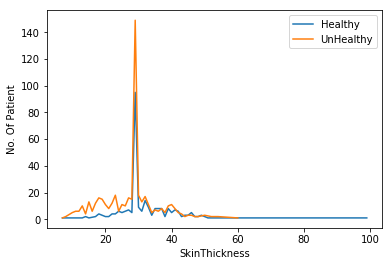

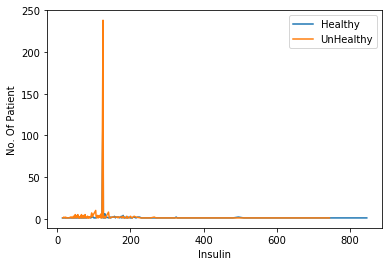

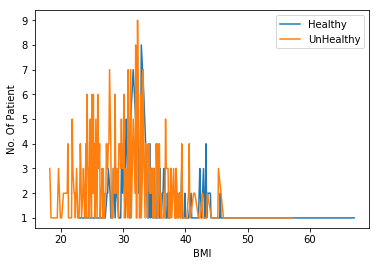

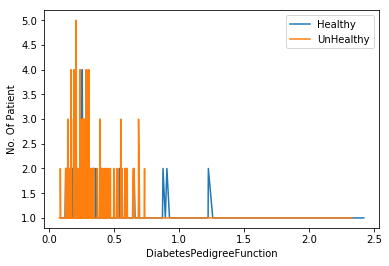

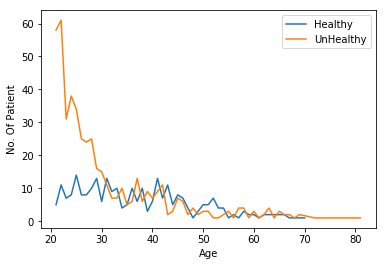

In [38]:
ploter = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in ploter:
    plt.plot(df[df['Outcome']==1].groupby(i)[['Outcome']].count(),label='Healthy')
    plt.plot(df[df['Outcome']==0].groupby(i)[['Outcome']].count(),label='UnHealthy')
    plt.xlabel(i)
    plt.ylabel('No. Of Patient')
    plt.legend()

    plt.show()


## From The Above Graph It Is Clear That Insulin And Glucose Play A Major Role For Diabetes Patient

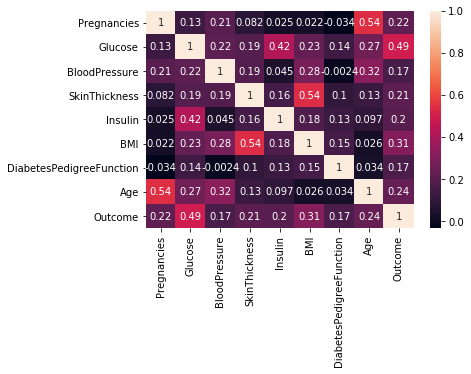

In [39]:
sns.heatmap(df.corr(),annot=True)

## Insulin And Gulcose Is Higly Co-Related And Glucose Plays A Major Role For Having  Diabetes

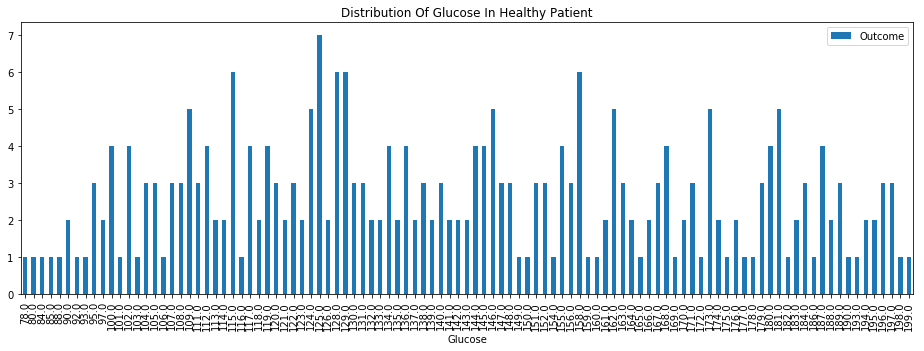

In [64]:
df[df['Outcome']==1].groupby('Glucose')[['Outcome']].count().plot(kind='bar',figsize=(16,5),title="Distribution Of Glucose In Healthy Patient")

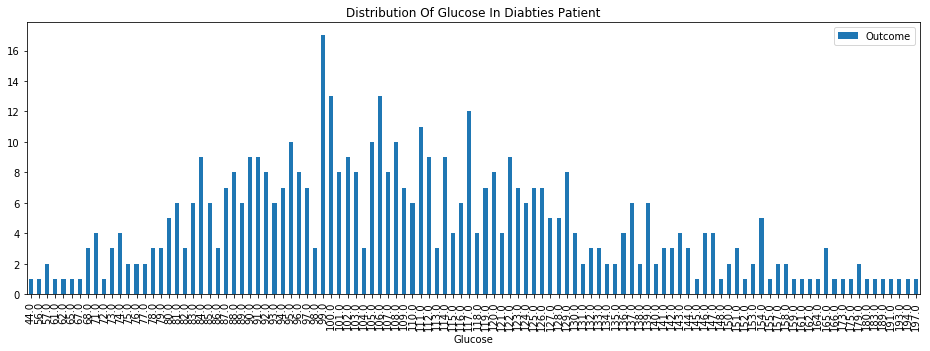

In [62]:
df[df['Outcome']==0].groupby('Glucose')[['Outcome']].count().plot(kind='bar',figsize=(16,5),title="Distribution Of Glucose In Diabties Patient")

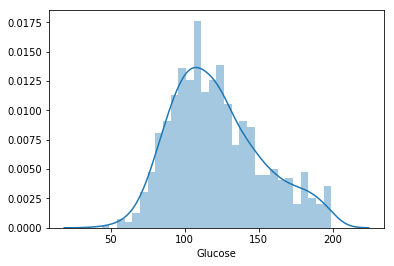

In [69]:
sns.distplot(df['Glucose'], kde = True, hist = True, rug= False, bins= 30)

SyntaxError: invalid syntax (<ipython-input-70-0c24d6b53cfd>, line 1)

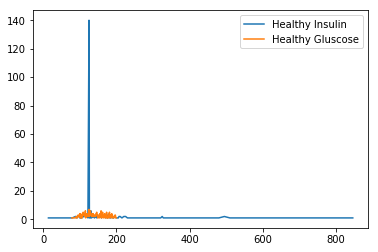

In [79]:
plt.plot(df[df['Outcome']==1].groupby('Insulin')[['Outcome']].count(),label='Healthy Insulin')
plt.plot(df[df['Outcome']==1].groupby('Glucose')[['Outcome']].count(),label='Healthy Gluscose')

plt.legend()
plt.show()    


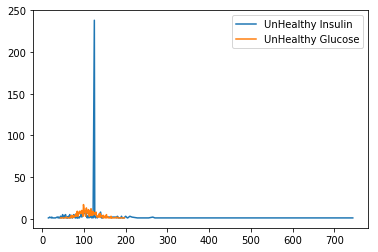

In [77]:
plt.plot(df[df['Outcome']==0].groupby('Insulin')[['Outcome']].count(),label='UnHealthy Insulin')
plt.plot(df[df['Outcome']==0].groupby('Glucose')[['Outcome']].count(),label='UnHealthy Glucose')

plt.legend()
plt.show()    

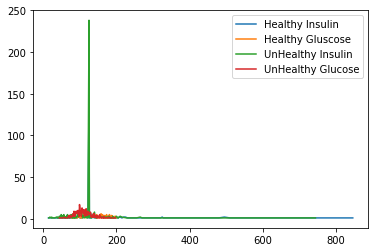

In [82]:
plt.plot(df[df['Outcome']==1].groupby('Insulin')[['Outcome']].count(),label='Healthy Insulin')
plt.plot(df[df['Outcome']==1].groupby('Glucose')[['Outcome']].count(),label='Healthy Gluscose')
plt.plot(df[df['Outcome']==0].groupby('Insulin')[['Outcome']].count(),label='UnHealthy Insulin')
plt.plot(df[df['Outcome']==0].groupby('Glucose')[['Outcome']].count(),label='UnHealthy Glucose')

plt.legend()
plt.show()    
